In [6]:
import torch
from torch import nn
from torchvision.transforms import ToTensor, Lambda, Compose
import matplotlib.pyplot as plt
from torchvision.transforms import functional as TF
import numpy as np
import torch.nn.functional as F
from torch.autograd import Variable

from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
import cv2        
import os
# import wandb

from helper import get_file_names, ImageDenoisingDataset, DoubleConv, UNet, DiceLoss, FocalLoss, CombinedLoss

In [7]:
import cv2
import glob

input_files = glob.glob('/data/padmalab/ecg/data/external/PhysioNet2024_Data/physionet.org/files/ptb-xl/1.0.3/records100_generate_output/records100_generate_output_03000/*.png')
input_file_names = get_file_names(input_files)

output_files = glob.glob('/data/padmalab/ecg/data/external/PhysioNet2024_Data/physionet.org/files/ptb-xl/1.0.3/records100_ground_truth/records100_ground_truth_03000/*.png')
output_file_names = get_file_names(output_files)

Total 995 files
Total 1146 files


In [8]:
import wandb

device = torch.device("cuda:1" if torch.cuda.is_available() else "cpu")
# device = 'cpu'

# Initialize Weights & Biases run
# wandb.init(project='Physionet 24', entity='weijiesun')

batch_size = 1
num_epochs = 5

# Configurations can be added (like hyperparameters)
# wandb.config = {
#   "learning_rate": 1e-4,
#   "epochs": num_epochs,
#   "batch_size":batch_size64
# }
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Example normalization values
])
dataset = ImageDenoisingDataset(input_file_names=input_file_names, transform=transform)
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

model = UNet(n_channels=3, n_classes=3).to(device) # Adjust as necessary
# criterion = CombinedLoss(alpha=1, gamma=2, logits=True, reduce=True).to(device)
criterion = DiceLoss().to(device)

optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)
for epoch in range(num_epochs):
    model.train()
    for inputs, targets in dataloader:    
        inputs, targets = inputs.to(device), targets.to(device)
        
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()
        # wandb.log({"epoch": epoch, "loss": loss.item()})
        print(f'Epoch {epoch+1}, Loss: {loss.item()}')
# wandb.finish()

Epoch 1, Loss: 0.3489058017730713
Epoch 1, Loss: 0.34726256132125854
Epoch 1, Loss: 0.3448096513748169
Epoch 1, Loss: 0.3425394892692566
Epoch 1, Loss: 0.3375122547149658
Epoch 1, Loss: 0.34005820751190186
Epoch 1, Loss: 0.3364524841308594
Epoch 1, Loss: 0.3333589434623718
Epoch 1, Loss: 0.328758180141449
Epoch 1, Loss: 0.3253489136695862
Epoch 1, Loss: 0.3227965831756592
Epoch 1, Loss: 0.3233245611190796
Epoch 1, Loss: 0.3225584626197815
Epoch 1, Loss: 0.3160421848297119
Epoch 1, Loss: 0.31074148416519165
Epoch 1, Loss: 0.30849772691726685
Epoch 1, Loss: 0.30829066038131714
Epoch 1, Loss: 0.3016362190246582
Epoch 1, Loss: 0.30311280488967896
Epoch 1, Loss: 0.3022874593734741
Epoch 1, Loss: 0.2967541813850403
Epoch 1, Loss: 0.29862451553344727
Epoch 1, Loss: 0.2927612066268921
Epoch 1, Loss: 0.2952677011489868
Epoch 1, Loss: 0.2945929765701294
Epoch 1, Loss: 0.28723472356796265
Epoch 1, Loss: 0.2888142466545105
Epoch 1, Loss: 0.284051775932312
Epoch 1, Loss: 0.28172850608825684
Epoch 1

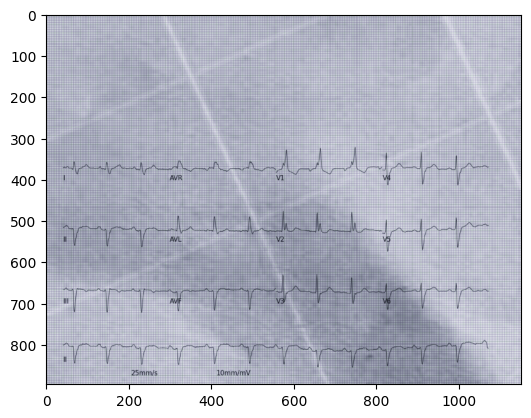

In [9]:
# Input
input_temp = inputs.detach().cpu().squeeze().permute(1, 2, 0).numpy()
plt.imshow(input_temp)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


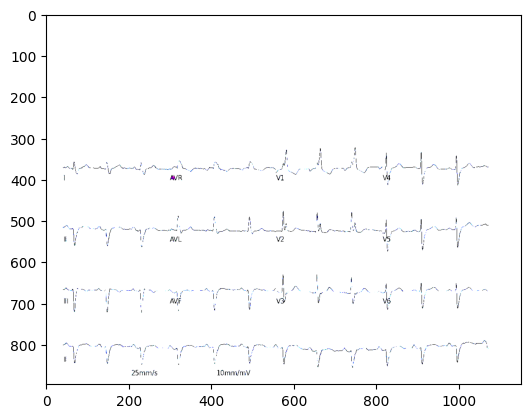

In [10]:
# Output
output_temp = outputs.detach().cpu().squeeze().permute(1, 2, 0).numpy()
plt.imshow(output_temp)

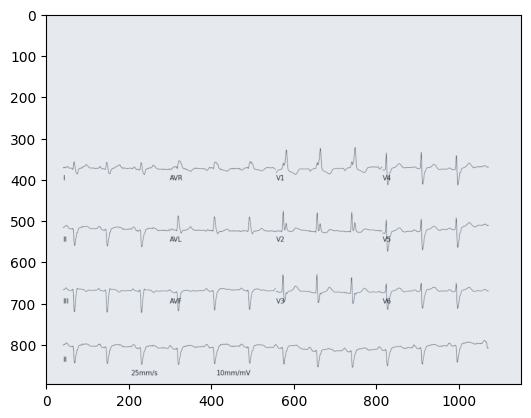

In [11]:
# Target
target_temp = targets.detach().cpu().squeeze().permute(1, 2, 0).numpy()
plt.imshow(target_temp)